In [24]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split


filename = 'mnist_traindata.hdf5'
f = h5py.File(filename, 'r')

a_group_key = list(f.keys())
print(a_group_key)
xdata = np.array(f[a_group_key[0]])
ydata = np.array(f[a_group_key[1]])

filename1 = 'mnist_testdata.hdf5'
f1 = h5py.File(filename1, 'r')
b_group_key = list(f1.keys())
print(b_group_key)
xdata_test = np.array(f1[b_group_key[0]])
ydata_test = np.array(f1[b_group_key[1]])



['xdata', 'ydata']
['xdata', 'ydata']


In [25]:
print(xdata_test.shape)
print(ydata_test.shape)

(10000, 784)
(10000, 10)


In [4]:
xdata_train, xdata_val, ydata_train, ydata_val = train_test_split(xdata,ydata,test_size = 0.16666)

In [5]:
print((ydata_train))
# print(ydata_val)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def relu(x):
    return np.maximum(x,0)

def drelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def dtanh(x):
    return (1-(np.tanh(x)**2))


In [30]:
# 1 hidden layer

import numpy as np
nn_input_dim = 784
nn_hdim = 100
nn_output_dim = 10
epsilon = 0.7
num_epochs = 50
mini_batch = 50
accuracy_val = []
accuracy_train = []

w1_avg = 0
b1_avg = 0
w2_avg = 0
b2_avg = 0

w1 = np.random.uniform(-1,1,(nn_input_dim,nn_hdim))
b1 = np.random.uniform(-1,1,(1, nn_hdim))
w2 = np.random.uniform(-1,1,(nn_hdim,nn_output_dim))
b2 = np.random.uniform(-1,1,(1, nn_output_dim))

y = np.zeros((len(xdata_train),10))
y1 = np.zeros((len(xdata_val),10))
y2 = np.zeros((len(xdata_train),10))

for epoch in range(0, num_epochs):
    correct_val = 0
    correct_train = 0
    
    ## For training samples
    for i in range(0, len(xdata_train)):
        ## Forward propogation
        a0 = xdata_train[i]
        a0 = a0.reshape((1,len(a0)))
        z1 = np.dot(a0,w1) + b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,w2) + b2
        y[i] = softmax(z2)

        ## Back propogation
        delta3 = y[i] - ydata_train[i]
        delta3 = delta3.reshape((1,len(delta3)))
        dw2 = np.dot(a1.transpose(), delta3)
        db2 = delta3
        delta2 = (1-(np.tanh(z1)**2)) * (np.dot(delta3, w2.transpose()))
        dw1 = np.dot(a0.transpose(),delta2)
        db1 = delta2

        ## Adding update to running average
        w1_avg += epsilon * dw1
        b1_avg += epsilon * db1
        w2_avg += epsilon * dw2
        b2_avg += epsilon * db2

        ## update
        if i % mini_batch == 0:
            w1 = w1 - (w1_avg / mini_batch)
            b1 = b1 - (b1_avg / mini_batch)
            w2 = w2 - (w2_avg / mini_batch)
            b2 = b2 - (b2_avg / mini_batch)
            w1_avg = 0
            b1_avg = 0
            w2_avg = 0
            b2_avg = 0

    ## For validation samples
    for j in range(0, len(xdata_val)):
        ## Forward propogation
        a0 = xdata_val[j]
        a0 = a0.reshape((1,len(a0)))
        z1 = np.dot(a0,w1) + b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,w2) + b2
        y1[j] = softmax(z2)

        idx_predict = np.argmax(y1[j])
        idx_actual = np.argmax(ydata_val[j])
        if idx_predict == idx_actual:
            correct_val += 1
    acc_val = (correct_val/len(xdata_val)) * 100
    accuracy_val.append(acc_val)
    
    for k in range(0, len(xdata_train)):
        ## Forward propogation
        a0 = xdata_train[k]
        a0 = a0.reshape((1,len(a0)))
        z1 = np.dot(a0,w1) + b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1,w2) + b2
        y2[k] = softmax(z2)

        idx_predict = np.argmax(y2[k])
        idx_actual = np.argmax(ydata_train[k])
        if idx_predict == idx_actual:
            correct_train += 1
    acc_train = (correct_train/len(xdata_train)) * 100
    accuracy_train.append(acc_train)
    
    

    print('Accuracy for train :  ', acc_train, '.....   Accuracy for val :  ',acc_val )

    

    
        
    


Accuracy for train :   92.018 .....   Accuracy for val :   90.71000000000001
Accuracy for train :   94.306 .....   Accuracy for val :   92.38
Accuracy for train :   95.492 .....   Accuracy for val :   93.08999999999999
Accuracy for train :   96.28999999999999 .....   Accuracy for val :   93.65
Accuracy for train :   96.64399999999999 .....   Accuracy for val :   93.83
Accuracy for train :   96.898 .....   Accuracy for val :   94.06
Accuracy for train :   97.25 .....   Accuracy for val :   94.26
Accuracy for train :   97.502 .....   Accuracy for val :   94.36
Accuracy for train :   97.76 .....   Accuracy for val :   94.44
Accuracy for train :   97.95 .....   Accuracy for val :   94.57
Accuracy for train :   98.10600000000001 .....   Accuracy for val :   94.42
Accuracy for train :   98.26 .....   Accuracy for val :   94.51
Accuracy for train :   98.406 .....   Accuracy for val :   94.59
Accuracy for train :   98.542 .....   Accuracy for val :   94.63000000000001
Accuracy for train :   98

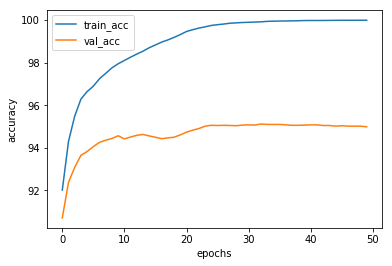

In [31]:
import matplotlib.pyplot as plt

epochs = list(range(0,50))

plt.plot(epochs,accuracy_train)
plt.plot(epochs,accuracy_val)
plt.legend(('train_acc','val_acc'))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

    

In [79]:
import matplotlib.pyplot as plt
nn_input_dim = 784
nn_output_dim = 10
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength
num_examples = len(xdata_train)

def build_model(nn_hdim, num_passes=50, print_loss=False):
     
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
     
    # Gradient descent. For each batch...
    for i in range(0, num_passes):
 
        # Forward propagation
        z1 = xdata_train.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs - ydata_train
#         print(delta3)
#         delta3[range(num_examples), ydata_train] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(xdata_train.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
     
    return model